In [77]:
import pandas as pd 
import numpy as np 

<h3>Load the Dataset<h3>

In [78]:
data = pd.read_csv("covid_19_data.csv",index_col="SNo")
df = data.copy()
df

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
6718,03/18/2020,NaN,Guernsey,2020-03-17T18:33:03,0.0,0.0,0.0
6719,03/18/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
6720,03/18/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0


In [79]:
df.describe(include="all")

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
count,6722,3956,6722,6722,6722.000000,6722.000000,6722.000000
unique,57,276,179,1637,NaN,NaN,NaN
top,03/18/2020,Hebei,Mainland China,2020-03-11T20:00:00,NaN,NaN,NaN
freq,284,59,1765,197,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,601.195924,19.855846,226.341267
std,NaN,NaN,NaN,NaN,4896.332140,204.486922,2556.035202
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,2.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,13.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,108.000000,1.000000,11.000000


Null Check

In [80]:
df.isnull().sum()

ObservationDate       0
Province/State     2766
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

<Axes: >

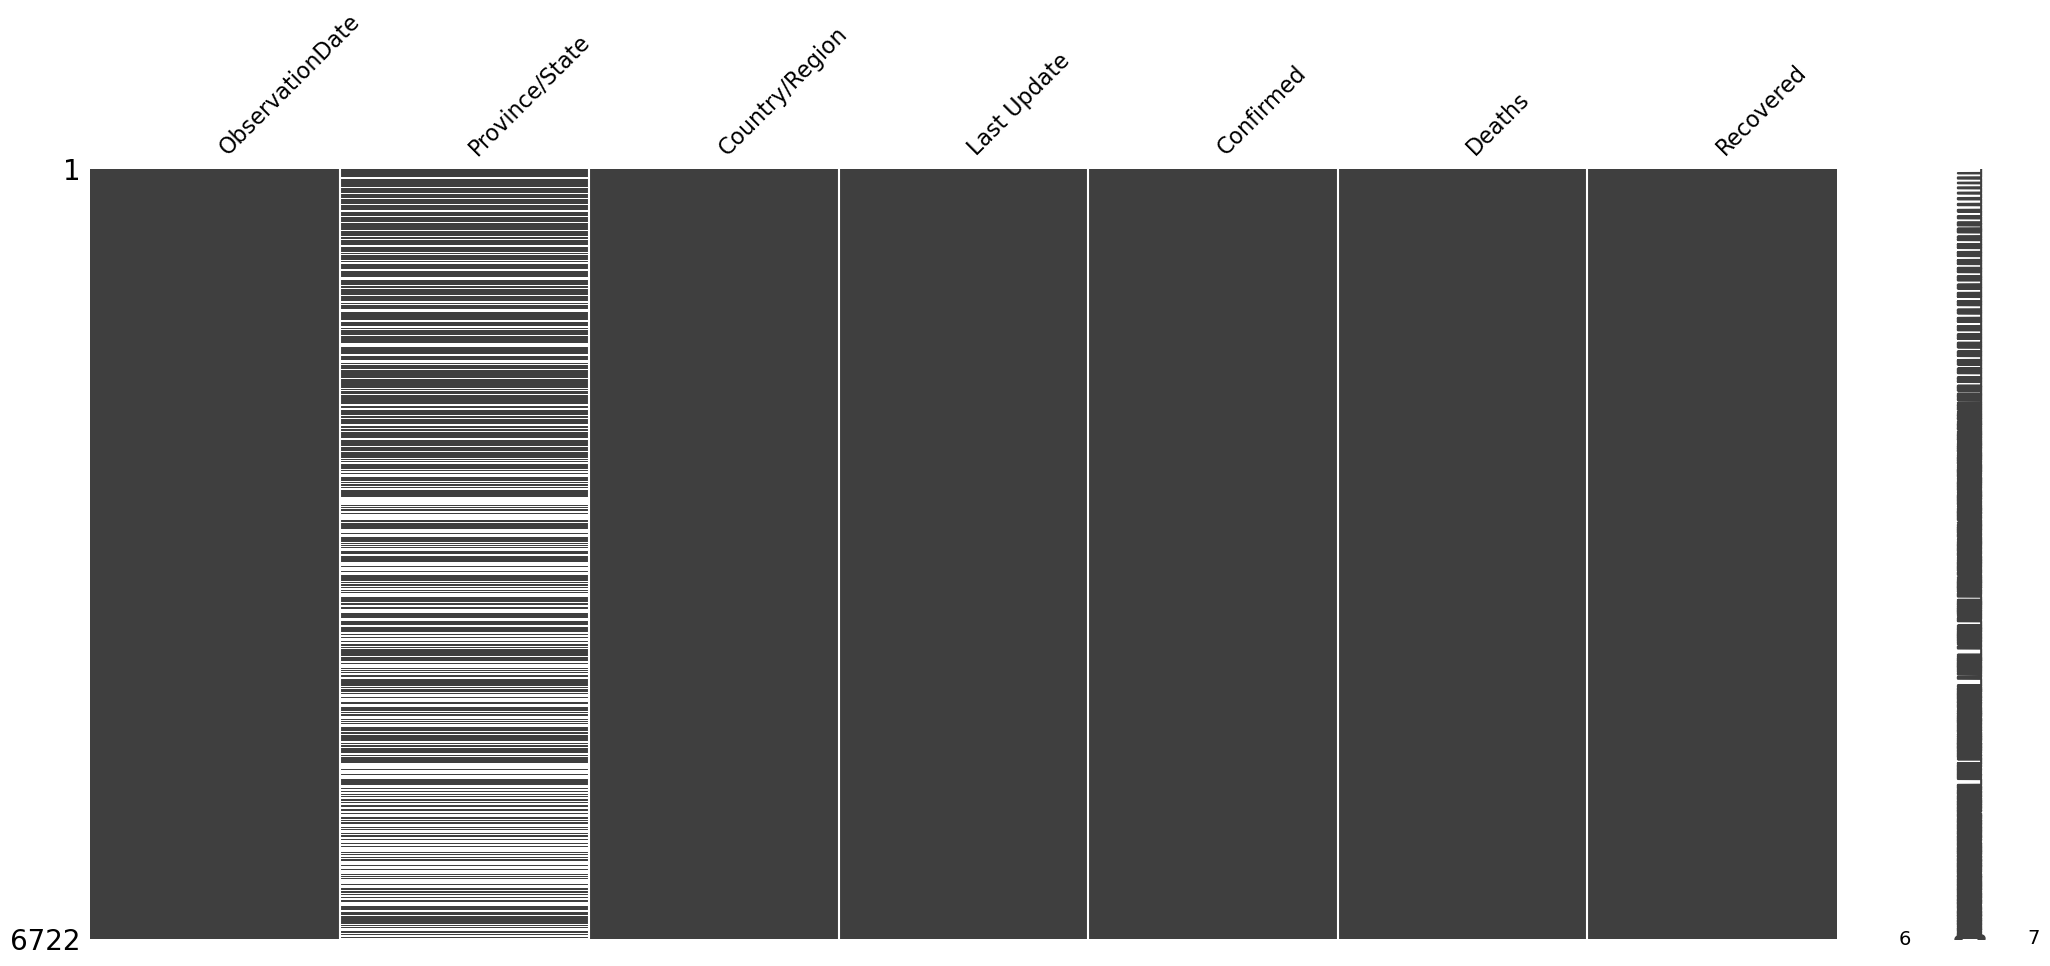

In [81]:
import missingno as msno 
msno.matrix(df)

<Axes: >

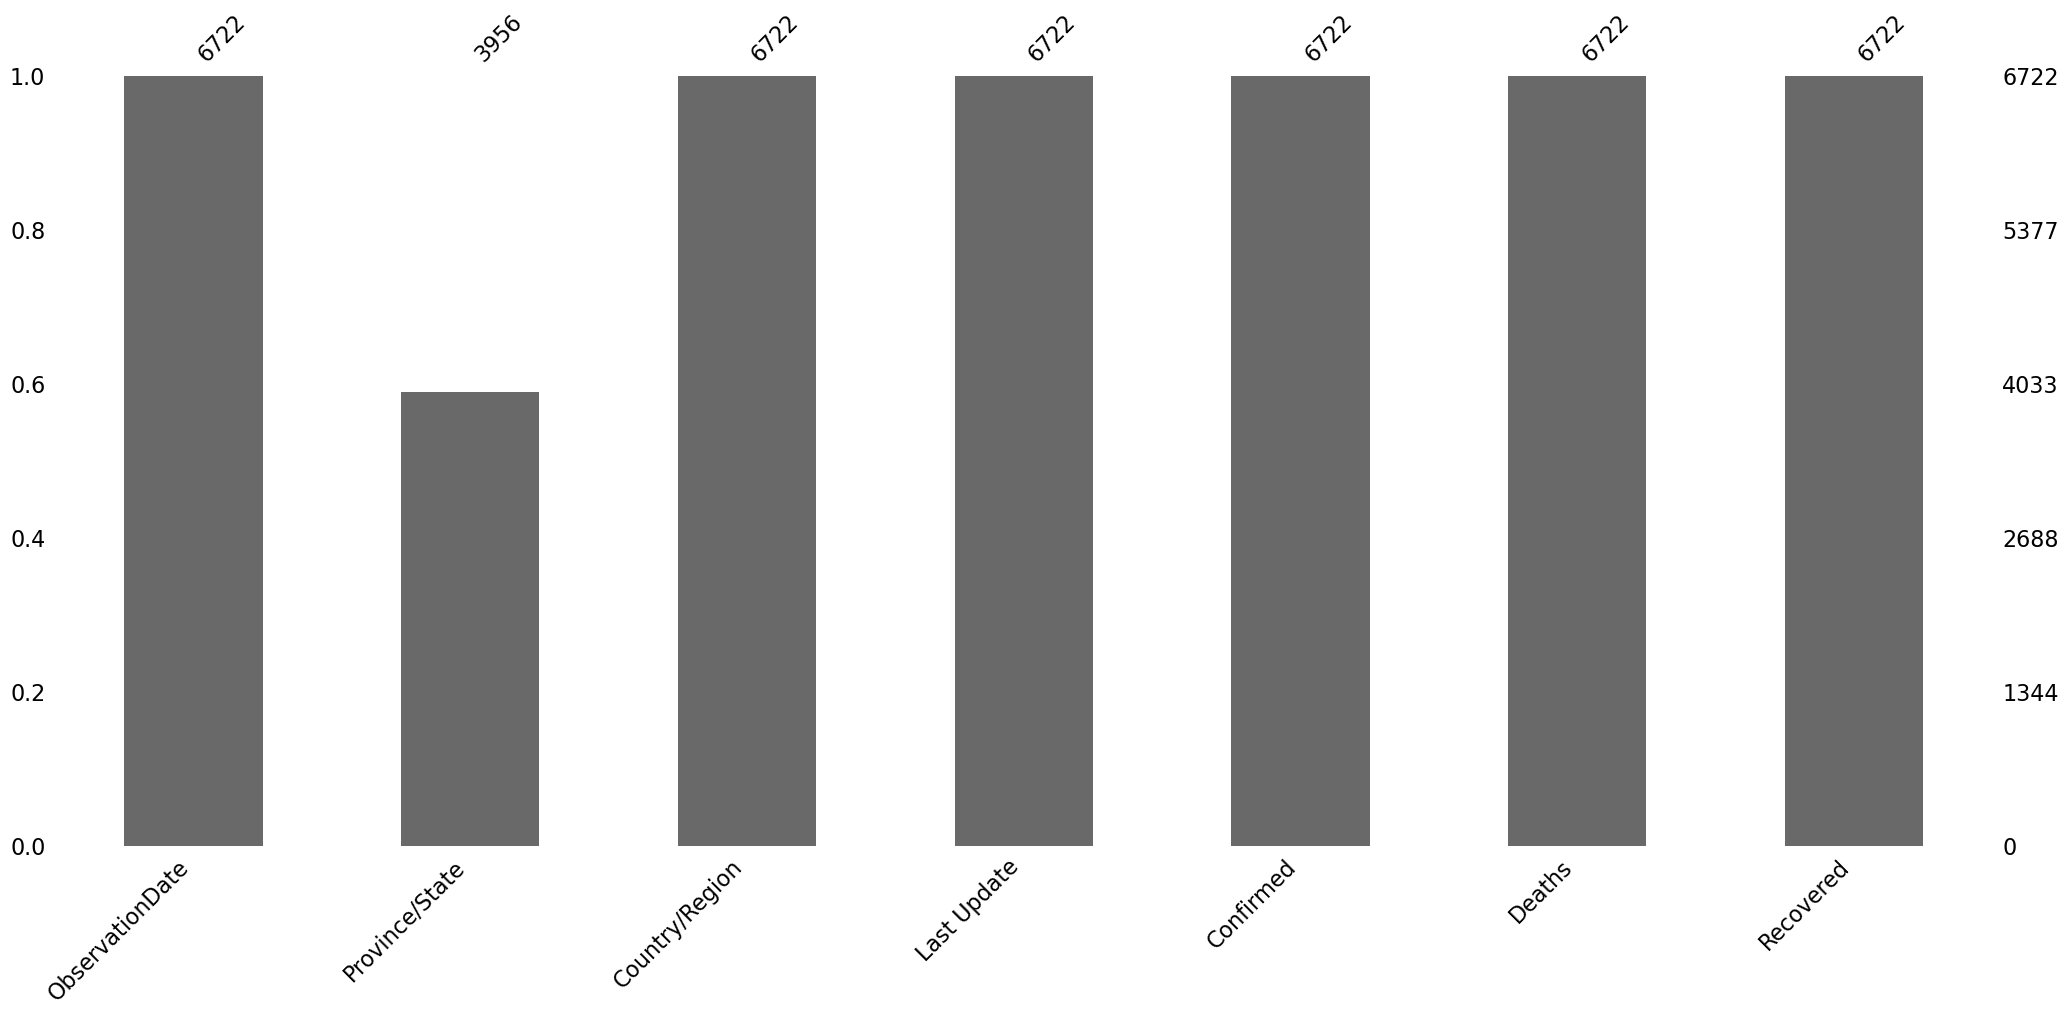

In [82]:
msno.bar(df)

In [83]:
unique_countries = sorted(df["Country/Region"].unique())
print("\n".join(unique_countries))

 Azerbaijan
('St. Martin',)
Afghanistan
Albania
Algeria
Andorra
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Brunei
Bulgaria
Burkina Faso
Cambodia
Cameroon
Canada
Cayman Islands
Central African Republic
Channel Islands
Chile
Colombia
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Croatia
Cuba
Curacao
Cyprus
Czech Republic
Denmark
Djibouti
Dominican Republic
Ecuador
Egypt
Equatorial Guinea
Estonia
Eswatini
Ethiopia
Faroe Islands
Finland
France
French Guiana
Gabon
Gambia, The
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Guadeloupe
Guam
Guatemala
Guernsey
Guinea
Guyana
Holy See
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Ivory Coast
Jamaica
Japan
Jersey
Jordan
Kazakhstan
Kenya
Kosovo
Kuwait
Kyrgyzstan
Latvia
Lebanon
Liberia
Liechtenstein
Lithuania
Luxembourg
Macau
Mainland China
Malaysia
Maldives
Malta
Martinique
Mauritania
M

Correction of country names

In [84]:
df["Country/Region"] = df["Country/Region"].map(lambda x : x.strip())


In [85]:
unique_countries = sorted(df["Country/Region"].unique())
print("\n".join(unique_countries))

('St. Martin',)
Afghanistan
Albania
Algeria
Andorra
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Brunei
Bulgaria
Burkina Faso
Cambodia
Cameroon
Canada
Cayman Islands
Central African Republic
Channel Islands
Chile
Colombia
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Croatia
Cuba
Curacao
Cyprus
Czech Republic
Denmark
Djibouti
Dominican Republic
Ecuador
Egypt
Equatorial Guinea
Estonia
Eswatini
Ethiopia
Faroe Islands
Finland
France
French Guiana
Gabon
Gambia, The
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Guadeloupe
Guam
Guatemala
Guernsey
Guinea
Guyana
Holy See
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Ivory Coast
Jamaica
Japan
Jersey
Jordan
Kazakhstan
Kenya
Kosovo
Kuwait
Kyrgyzstan
Latvia
Lebanon
Liberia
Liechtenstein
Lithuania
Luxembourg
Macau
Mainland China
Malaysia
Maldives
Malta
Martinique
Mauritania
Mauritius
May

In [86]:
df.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [87]:
df_new = df.drop(["Province/State","Last Update"],axis=1)
df_new

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
SNo,,,,,
1,01/22/2020,Mainland China,1.0,0.0,0.0
2,01/22/2020,Mainland China,14.0,0.0,0.0
3,01/22/2020,Mainland China,6.0,0.0,0.0
4,01/22/2020,Mainland China,1.0,0.0,0.0
5,01/22/2020,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
6718,03/18/2020,Guernsey,0.0,0.0,0.0
6719,03/18/2020,Jersey,0.0,0.0,0.0
6720,03/18/2020,Puerto Rico,0.0,0.0,0.0


In [88]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# df_new["Country/Region"] = encoder.fit_transform(df_new["Country/Region"])
df_new = df_new.drop(["Country/Region"],axis=1)
df_new.head(5)

,ObservationDate,Confirmed,Deaths,Recovered
SNo,,,,
1,01/22/2020,1.0,0.0,0.0
2,01/22/2020,14.0,0.0,0.0
3,01/22/2020,6.0,0.0,0.0
4,01/22/2020,1.0,0.0,0.0
5,01/22/2020,0.0,0.0,0.0


In [89]:
df_new = df_new.groupby(["ObservationDate"]).sum().reset_index()
df_new.head()

,ObservationDate,Confirmed,Deaths,Recovered
0,01/22/2020,555.0,17.0,28.0
1,01/23/2020,653.0,18.0,30.0
2,01/24/2020,941.0,26.0,36.0
3,01/25/2020,1438.0,42.0,39.0
4,01/26/2020,2118.0,56.0,52.0


In [90]:
df_new["ObservationDate"] = pd.to_datetime(df_new["ObservationDate"]) # changing data type to datetime
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationDate  57 non-null     datetime64[ns]
 1   Confirmed        57 non-null     float64       
 2   Deaths           57 non-null     float64       
 3   Recovered        57 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.9 KB


In [91]:
min_ob = min(df_new["ObservationDate"]) #first day

df_new["Day_Count"] = df_new["ObservationDate"].map(lambda x : (x - min_ob).days + 1) 
df_new.head()

,ObservationDate,Confirmed,Deaths,Recovered,Day_Count
0,2020-01-22,555.0,17.0,28.0,1
1,2020-01-23,653.0,18.0,30.0,2
2,2020-01-24,941.0,26.0,36.0,3
3,2020-01-25,1438.0,42.0,39.0,4
4,2020-01-26,2118.0,56.0,52.0,5


In [92]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationDate  57 non-null     datetime64[ns]
 1   Confirmed        57 non-null     float64       
 2   Deaths           57 non-null     float64       
 3   Recovered        57 non-null     float64       
 4   Day_Count        57 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 2.4 KB


In [93]:
df_new.drop("ObservationDate",axis=1,inplace=True)


In [94]:
df_new

,Confirmed,Deaths,Recovered,Day_Count
0,555.0,17.0,28.0,1
1,653.0,18.0,30.0,2
2,941.0,26.0,36.0,3
3,1438.0,42.0,39.0,4
4,2118.0,56.0,52.0,5
5,2927.0,82.0,61.0,6
6,5578.0,131.0,107.0,7
7,6165.0,133.0,126.0,8
8,8235.0,171.0,143.0,9
9,9925.0,213.0,222.0,10


Train/ Test split

In [95]:
X = df_new[["Day_Count"]]
y = df_new["Confirmed"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=41)

Modelling

In [96]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_model = lin_reg.fit(X_train,y_train)
lin_model 

LinearRegression()

In [97]:
y_pred = lin_model.predict(X_test)
from sklearn.metrics import r2_score, mean_absolute_percentage_error,mean_absolute_error
r2 = r2_score(y_test,y_pred)

mape = mean_absolute_percentage_error(y_test,y_pred)
print("mean absolute percentage error: ",mape) 

mae = mean_absolute_error(y_test,y_pred)
print("mean absolute error",mae) 



mean absolute percentage error:  0.22808469144194163
mean absolute error 12303.21958192453


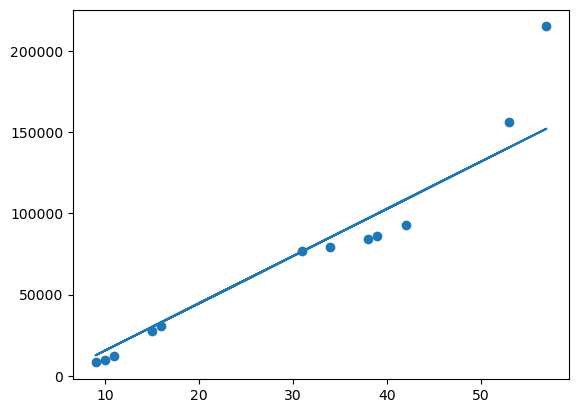

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)


In [99]:
X_f = np.array([58,59,60,61,62,63,64])
y_pred_f = lin_model.predict(X_f.reshape(-1,1)) #predict next 7 days

next_days = pd.DataFrame({"Confirmed":y_pred_f})

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [100]:
df_new["Infected"] = df_new["Confirmed"]-df_new["Recovered"]-df_new["Deaths"]

df_new

,Confirmed,Deaths,Recovered,Day_Count,Infected
0,555.0,17.0,28.0,1,510.0
1,653.0,18.0,30.0,2,605.0
2,941.0,26.0,36.0,3,879.0
3,1438.0,42.0,39.0,4,1357.0
4,2118.0,56.0,52.0,5,2010.0
5,2927.0,82.0,61.0,6,2784.0
6,5578.0,131.0,107.0,7,5340.0
7,6165.0,133.0,126.0,8,5906.0
8,8235.0,171.0,143.0,9,7921.0
9,9925.0,213.0,222.0,10,9490.0


In [101]:
X = df_new[["Day_Count"]]
y = df_new["Infected"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [102]:
lin_model = lin_reg.fit(X_train,y_train)
lin_model

LinearRegression()

In [103]:
y_pred = lin_model.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)
print("mean absolute error: ",mae) 

mape = mean_absolute_percentage_error(y_test,y_pred)
print("mean absolute percentage error: ",mape) 

r2 = r2_score(y_test,y_pred)
print("r2 score: ",r2) 

mean absolute error:  11302.393041045449
mean absolute percentage error:  1.9405542887868057
r2 score:  0.7665915348052683


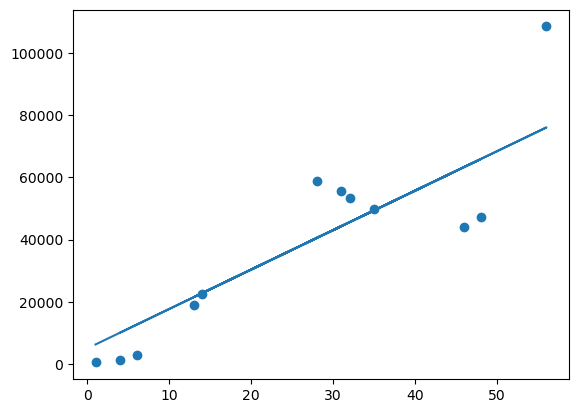

In [104]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)

In [105]:
X_f = np.array([58,59,60,61,62,63,64])
y_pred_f = lin_model.predict(X_f.reshape(-1,1)) #predict next 7 days
y_pred_f
next_days["Infected"] = y_pred_f


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [106]:
X = df_new[["Day_Count"]]
y = df_new["Recovered"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)



In [107]:
lin_model = lin_reg.fit(X_train,y_train)
lin_model

LinearRegression()

In [108]:
y_pred = lin_model.predict(X_test)
r2 = r2_score(y_test,y_pred)
r2 

0.9437969822549052

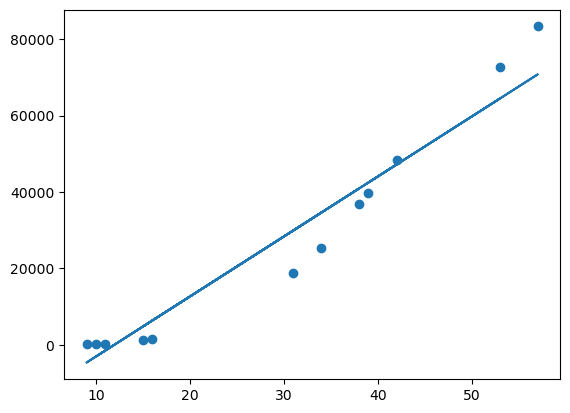

In [109]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)

In [110]:
X_f = np.array([58,59,60,61,62,63,64])
y_pred_f = lin_model.predict(X_f.reshape(-1,1)) #predict next 7 days
y_pred_f

next_days["Recovered"] = y_pred_f

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [111]:
X = df_new[["Day_Count"]]
y = df_new["Deaths"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [112]:
lin_model = lin_model.fit(X_train,y_train)
lin_model

LinearRegression()

In [113]:
y_pred = lin_model.predict(X_test)

r2 = r2_score(y_test,y_pred)
r2

0.8303070629391971

In [114]:
X_f = np.array([58,59,60,61,62,63,64])
y_pred_f = lin_model.predict(X_f.reshape(-1,1)) #predict next 7 days
y_pred_f

next_days["Deaths"]= y_pred_f
next_days["Days"]= X_f 
next_days #data frame for the next 7 days

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Confirmed,Infected,Recovered,Deaths,Days
0,154951.673085,78536.008591,72317.093353,5562.003643,58
1,157856.129098,79803.359800,73887.854939,5674.095993,59
2,160760.585111,81070.711009,75458.616525,5786.188344,60
3,163665.041124,82338.062218,77029.378111,5898.280694,61
4,166569.497136,83605.413427,78600.139697,6010.373045,62
5,169473.953149,84872.764636,80170.901283,6122.465395,63
6,172378.409162,86140.115845,81741.662869,6234.557746,64
